# LISUM09, Week 2, G2M insight for Cab Investment firm ( Must for all Specialization)
## Name: Laâroussi Saâdeddine
## Mail : laar.saad.eddine@gmail.com
## Country : Morocco

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns

path = "DataSets/"
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Reading Data 

Importing Data, Holiday US Data was added

In [2]:
Cab_Data = pd.read_csv(path+"Cab_Data.csv")
City_Data = pd.read_csv(path+"City.csv")
Customer_ID_Data = pd.read_csv(path+"Customer_ID.csv")
Transaction_ID_Data = pd.read_csv(path+"Transaction_ID.csv")
HolidayUS_Data = pd.read_csv(path+"Holiday_US.csv")

# Cleaning Data

### 1) Cab_Data

In [3]:
display(Cab_Data.head())
display(Cab_Data.dtypes)
Cab_Data.shape

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78


Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

(359392, 7)

#### Checking NULL values

In [4]:
Cab_Data.isnull().values.any()

False

#### Checking for duplicate Transaction ID 

In [5]:
Cab_Data[Cab_Data['Transaction ID'].duplicated(keep=False)]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


#### Change Date of travel to datetime

In [6]:
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'], unit='D', origin='1899-12-30')
# origin date is set to 30 december 1899 because the data is provided from an excel source and this is the origin date for excel

In [7]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78


#### Adding columns

A Profit column = Price charged - Cost of Trip <br>
A Year, Month, Day and Day of Week column extracted from Date of Travel

In [8]:
Cab_Data['Benefit'] = Cab_Data['Price Charged'] - Cab_Data['Cost of Trip']
Cab_Data['Benefit/KM'] = Cab_Data['Benefit'] / Cab_Data['KM Travelled']
Cab_Data['Year'] = Cab_Data['Date of Travel'].dt.year
Cab_Data['Month'] = Cab_Data['Date of Travel'].dt.month
Cab_Data['Day'] = Cab_Data['Date of Travel'].dt.day
Days=("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
Cab_Data['Day of Week'] =  Cab_Data['Date of Travel'].dt.dayofweek
for i in range(0,7):
    Cab_Data.loc[Cab_Data['Day of Week']==i,'Day of Week'] = Days[i]
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Benefit,Benefit/KM,Year,Month,Day,Day of Week
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,1.88,2016,1,8,Friday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,0.83,2016,1,6,Wednesday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,3.05,2016,1,2,Saturday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,0.78,2016,1,7,Thursday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,1.93,2016,1,3,Sunday


### 2) City_Data

In [9]:
display(City_Data.head())
display(City_Data.dtypes)
City_Data.shape

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


City          object
Population    object
Users         object
dtype: object

(20, 3)

#### Checking NULL values

In [10]:
City_Data.isnull().values.any()

False

#### Checking for duplicate City

In [11]:
City_Data[City_Data['City'].duplicated(keep=False)]

,City,Population,Users


#### Transforming Population and Users column into Integers

In [12]:
City_Data['Population']=City_Data['Population'].str.replace(",","")
City_Data['Population']=City_Data['Population'].str.strip()
City_Data['Users']=City_Data['Users'].str.replace(",","")
City_Data['Users']=City_Data['Users'].str.strip()
City_Data['Population'] = City_Data['Population'].astype('int64')
City_Data['Users'] = City_Data['Users'].astype('int64')
display(City_Data.head())
display(City_Data.dtypes)
City_Data.shape

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


City          object
Population     int64
Users          int64
dtype: object

(20, 3)

#### Adding column with percentage of usage per population

In [13]:
City_Data['Usage %'] = City_Data['Users']/City_Data['Population'] *100
City_Data.head()

,City,Population,Users,Usage %
0,NEW YORK NY,8405837,302149,3.59
1,CHICAGO IL,1955130,164468,8.41
2,LOS ANGELES CA,1595037,144132,9.04
3,MIAMI FL,1339155,17675,1.32
4,SILICON VALLEY,1177609,27247,2.31


#### Adding columns for number of users from each companies and their percentage from the overall cab users

In [14]:
cities = [City for City, City_Data2 in City_Data.groupby('City')]

City_Data['Pink Cab Users'] = 0

for city in cities:
    city_users=Cab_Data.loc[(Cab_Data['Company'] == "Pink Cab") & (Cab_Data['City'] == city)].groupby('City').count()
    if not city_users.empty :
        City_Data.loc[City_Data['City']==city,'Pink Cab Users']= city_users['Transaction ID'][0]
    
City_Data['Pink Cab% from users'] =  (City_Data['Pink Cab Users']/City_Data['Users'])*100  

City_Data['Yellow Cab Users'] = 0

for city in cities:
    city_users=Cab_Data.loc[(Cab_Data['Company'] == "Yellow Cab") & (Cab_Data['City'] == city)].groupby('City').count()
    if not city_users.empty :
        City_Data.loc[City_Data['City']==city,'Yellow Cab Users']= city_users['Transaction ID'][0]
    
City_Data['Yellow Cab% from users'] =  (City_Data['Yellow Cab Users']/City_Data['Users'])*100  

City_Data.head()

,City,Population,Users,Usage %,Pink Cab Users,Pink Cab% from users,Yellow Cab Users,Yellow Cab% from users
0,NEW YORK NY,8405837,302149,3.59,13967,4.62,85918,28.44
1,CHICAGO IL,1955130,164468,8.41,9361,5.69,47264,28.74
2,LOS ANGELES CA,1595037,144132,9.04,19865,13.78,28168,19.54
3,MIAMI FL,1339155,17675,1.32,2002,11.33,4452,25.19
4,SILICON VALLEY,1177609,27247,2.31,3797,13.94,4722,17.33


### 3) Customer_ID_Data

In [15]:
display(Customer_ID_Data.head())
display(Customer_ID_Data.dtypes)
Customer_ID_Data.shape

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

(49171, 4)

#### Checking NULL values

In [16]:
Customer_ID_Data.isnull().values.any()

False

#### Checking for duplicate Customer ID 

In [17]:
Customer_ID_Data[Customer_ID_Data['Customer ID'].duplicated(keep=False)]

,Customer ID,Gender,Age,Income (USD/Month)


#### Adding Age group and Income Group Column

In [18]:
Customer_ID_Data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.00,49171.00,49171.00
mean,28398.25,35.36,15015.63
std,17714.14,12.60,8002.21
min,1.00,18.00,2000.00
25%,12654.50,25.00,8289.50
50%,27631.00,33.00,14656.00
75%,43284.50,42.00,21035.00
max,60000.00,65.00,35000.00


In [19]:
Customer_ID_Data.loc[(Customer_ID_Data['Age']>=18) & (Customer_ID_Data['Age']<=25),'Age Group']="18-25"
Customer_ID_Data.loc[(Customer_ID_Data['Age']>=26) & (Customer_ID_Data['Age']<=35),'Age Group']="26-35"
Customer_ID_Data.loc[(Customer_ID_Data['Age']>=36) & (Customer_ID_Data['Age']<=45),'Age Group']="36-45"
Customer_ID_Data.loc[(Customer_ID_Data['Age']>=46) & (Customer_ID_Data['Age']<=55),'Age Group']="46-55"
Customer_ID_Data.loc[(Customer_ID_Data['Age']>=56) & (Customer_ID_Data['Age']<=65),'Age Group']="56-65"

Customer_ID_Data.loc[(Customer_ID_Data['Income (USD/Month)']>=2000) & (Customer_ID_Data['Income (USD/Month)']<10000),'Income Group']="2000-10000"
Customer_ID_Data.loc[(Customer_ID_Data['Income (USD/Month)']>=10000) & (Customer_ID_Data['Income (USD/Month)']<20000),'Income Group']="10000-20000"
Customer_ID_Data.loc[(Customer_ID_Data['Income (USD/Month)']>=20000) & (Customer_ID_Data['Income (USD/Month)']<30000),'Income Group']="20000-30000"
Customer_ID_Data.loc[(Customer_ID_Data['Income (USD/Month)']>=30000),'Income Group']="30000"

Customer_ID_Data.head()


,Customer ID,Gender,Age,Income (USD/Month),Age Group,Income Group
0,29290,Male,28,10813,26-35,10000-20000
1,27703,Male,27,9237,26-35,2000-10000
2,28712,Male,53,11242,46-55,10000-20000
3,28020,Male,23,23327,18-25,20000-30000
4,27182,Male,33,8536,26-35,2000-10000


### 4) Transaction_ID_Data

In [20]:
display(Transaction_ID_Data.head())
display(Transaction_ID_Data.dtypes)
Transaction_ID_Data.shape

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

(440098, 3)

In [21]:
Transaction_ID_Data=Transaction_ID_Data.rename(columns={"Payment_Mode":"Payment Mode"})
Transaction_ID_Data.columns

Index(['Transaction ID', 'Customer ID', 'Payment Mode'], dtype='object')

#### Checking NULL values

In [22]:
Transaction_ID_Data.isnull().values.any()

False

#### Checking for duplicate Transaction ID and Customer ID

In [23]:
Transaction_ID_Data[Transaction_ID_Data[['Transaction ID','Customer ID']].duplicated()]

,Transaction ID,Customer ID,Payment Mode


# Merge Data

Merging Cab_Data with Transaction_ID_Data and Customer_ID_Data, City_Data was not merged to avoid redundancy of data

In [24]:
G2M_Data = Cab_Data.merge(Transaction_ID_Data,on='Transaction ID',how='left')
G2M_Data = G2M_Data.merge(Customer_ID_Data,on='Customer ID',how='left')
G2M_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Benefit,Benefit/KM,Year,Month,Day,Day of Week,Customer ID,Payment Mode,Gender,Age,Income (USD/Month),Age Group,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,1.88,2016,1,8,Friday,29290,Card,Male,28,10813,26-35,10000-20000
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,0.83,2016,1,6,Wednesday,27703,Card,Male,27,9237,26-35,2000-10000
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,3.05,2016,1,2,Saturday,28712,Cash,Male,53,11242,46-55,10000-20000
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,0.78,2016,1,7,Thursday,28020,Cash,Male,23,23327,18-25,20000-30000
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,1.93,2016,1,3,Sunday,27182,Card,Male,33,8536,26-35,2000-10000


In [25]:
G2M_Data = G2M_Data[['Transaction ID','Customer ID','Date of Travel','Day of Week','Day','Month','Year','Company','City','KM Travelled','Price Charged','Cost of Trip','Benefit','Benefit/KM','Payment Mode','Gender','Age','Age Group','Income (USD/Month)','Income Group']]

In [26]:
G2M_Data.head()

,Transaction ID,Customer ID,Date of Travel,Day of Week,Day,Month,Year,Company,City,KM Travelled,Price Charged,Cost of Trip,Benefit,Benefit/KM,Payment Mode,Gender,Age,Age Group,Income (USD/Month),Income Group
0,10000011,29290,2016-01-08,Friday,8,1,2016,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,1.88,Card,Male,28,26-35,10813,10000-20000
1,10000012,27703,2016-01-06,Wednesday,6,1,2016,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,0.83,Card,Male,27,26-35,9237,2000-10000
2,10000013,28712,2016-01-02,Saturday,2,1,2016,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,3.05,Cash,Male,53,46-55,11242,10000-20000
3,10000014,28020,2016-01-07,Thursday,7,1,2016,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,0.78,Cash,Male,23,18-25,23327,20000-30000
4,10000015,27182,2016-01-03,Sunday,3,1,2016,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,1.93,Card,Male,33,26-35,8536,2000-10000


#### Checking for outliers and removing them

 Describing the data to check the mean, max, min values and quartiles to see if there are outliers

In [27]:
display(G2M_Data[['KM Travelled','Price Charged', 'Cost of Trip','Benefit','Income (USD/Month)','Benefit/KM']].describe())

,KM Travelled,Price Charged,Cost of Trip,Benefit,Income (USD/Month),Benefit/KM
count,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
mean,22.57,423.44,286.19,137.25,15048.82,6.08
std,12.23,274.38,157.99,160.31,7969.41,5.54
min,1.90,15.60,19.00,-220.06,2000.00,-5.00
25%,12.00,206.44,151.20,28.01,8424.00,2.00
50%,22.44,386.36,282.48,81.96,14685.00,4.47
75%,32.96,583.66,413.68,190.03,21035.00,9.17
max,48.00,2048.03,691.20,1463.97,35000.00,41.12


In [173]:
display(G2M_Data[['KM Travelled','Price Charged', 'Cost of Trip','Benefit','Income (USD/Month)','Benefit/KM']].corr())

,KM Travelled,Price Charged,Cost of Trip,Benefit,Income (USD/Month),Benefit/KM
KM Travelled,1.00,0.89,0.98,0.43,-0.00,-0.12
Price Charged,0.89,1.00,0.91,0.78,-0.00,0.27
Cost of Trip,0.98,0.91,1.00,0.45,-0.00,-0.09
Benefit,0.43,0.78,0.45,1.00,0.00,0.73
Income (USD/Month),-0.00,-0.00,-0.00,0.00,1.00,0.00
Benefit/KM,-0.12,0.27,-0.09,0.73,0.00,1.00


Data is highly correlated between Price Charged, Cost of Trip and Benefit

Data might have outliers on Price Charged and Benefit, since the max value is very high compared to the mean

#### Checking scatter plots first to check relationships between some features and acertain if outliers are present

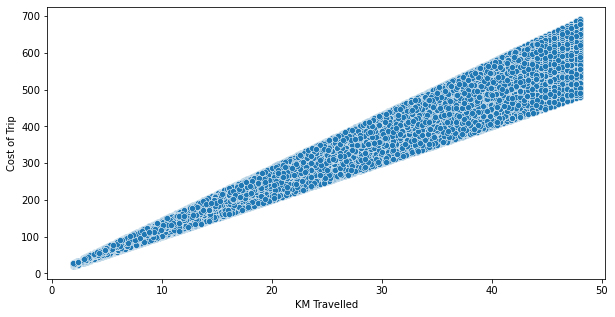

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=G2M_Data['KM Travelled'],y=G2M_Data['Cost of Trip'])
plt.show()

Data between features KM traveled and Cost of trip is almost linear, no outliers <br>
Checking scatterplot between KM traveled, Cost of trip with Price Charged and Benefit

<AxesSubplot:xlabel='Benefit', ylabel='Cost of Trip'>

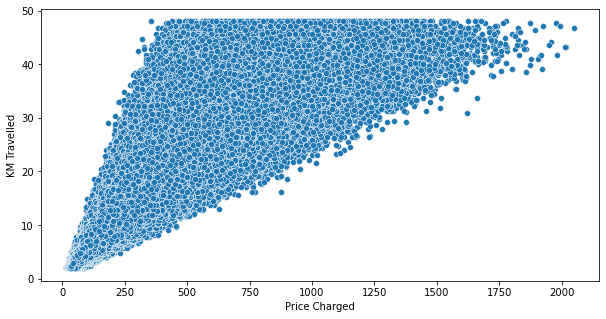

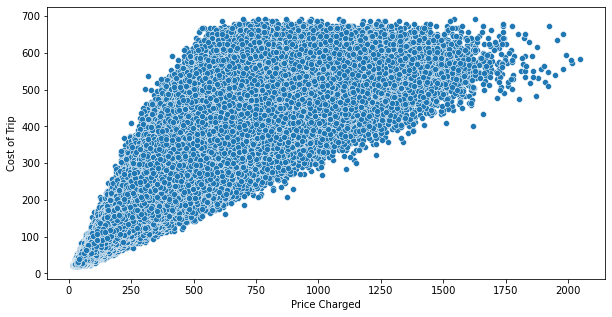

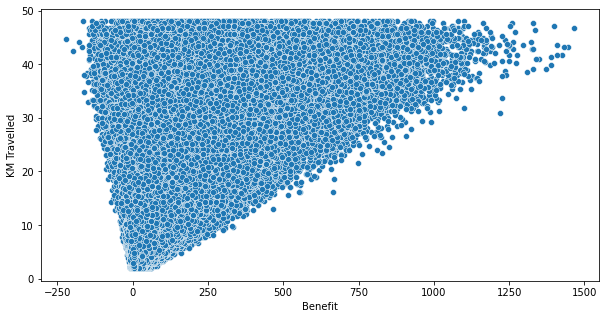

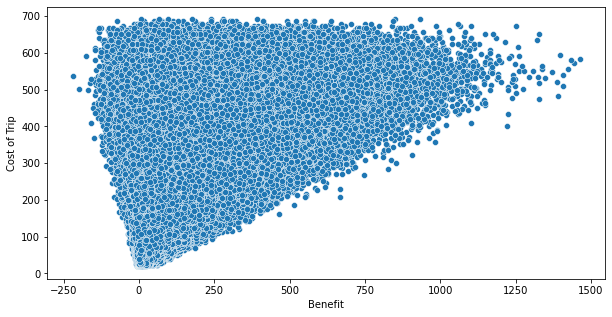

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Price Charged'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Price Charged'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Benefit'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Benefit'])

<Figure size 720x360 with 0 Axes>

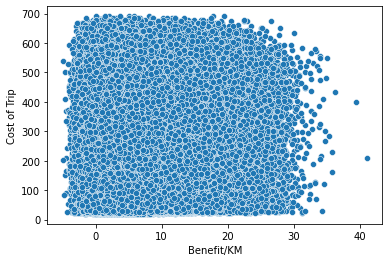

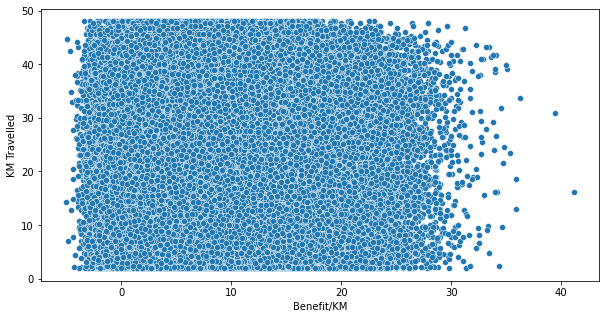

<Figure size 720x360 with 0 Axes>

In [31]:
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Benefit/KM'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Benefit/KM'])
plt.figure(figsize=(10,5))

Box plots are checked for features with visible outliers.

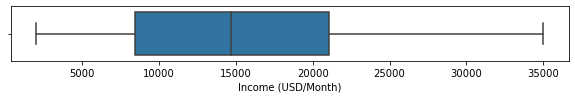

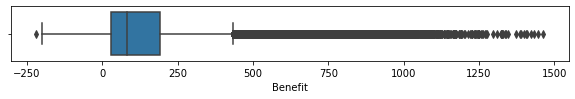

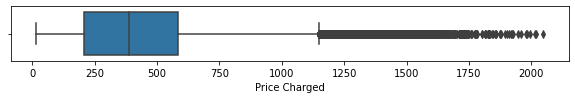

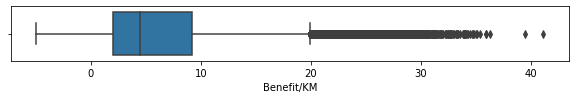

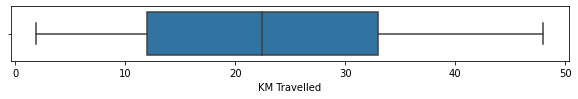

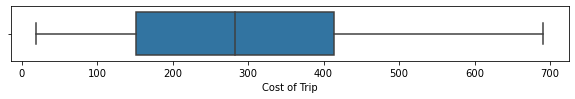

In [30]:
for column in {"KM Travelled","Price Charged", "Cost of Trip","Benefit","Income (USD/Month)", "Benefit/KM"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=G2M_Data, x=column)


Outliers exist on the Price Charged and the benefit, benefit/KM column so they need to be removed <br>
Removing them with InterQuantile range IQR

In [31]:
q1=G2M_Data['Price Charged'].quantile(0.25)
q3=G2M_Data['Price Charged'].quantile(0.75)
IQR=q3-q1
Price_Charged_Outliers = G2M_Data[((G2M_Data['Price Charged']<(q1-1.5*IQR)) | (G2M_Data['Price Charged']>(q3+1.5*IQR)))]
G2M_Data = G2M_Data[~((G2M_Data['Price Charged']<(q1-1.5*IQR)) | (G2M_Data['Price Charged']>(q3+1.5*IQR)))]
G2M_Data.dropna().reset_index()

q1=G2M_Data['Benefit'].quantile(0.25)
q3=G2M_Data['Benefit'].quantile(0.75)
IQR=q3-q1
Benefit_Outliers = G2M_Data[((G2M_Data['Benefit']<(q1-1.5*IQR)) | (G2M_Data['Benefit']>(q3+1.5*IQR)))]
G2M_Data = G2M_Data[~((G2M_Data['Benefit']<(q1-1.5*IQR)) | (G2M_Data['Benefit']>(q3+1.5*IQR)))]
G2M_Data.dropna().reset_index()

q1=G2M_Data['Benefit/KM'].quantile(0.25)
q3=G2M_Data['Benefit/KM'].quantile(0.75)
IQR=q3-q1
Benefit_KM_Outliers = G2M_Data[((G2M_Data['Benefit/KM']<(q1-1.5*IQR)) | (G2M_Data['Benefit/KM']>(q3+1.5*IQR)))]
G2M_Data = G2M_Data[~((G2M_Data['Benefit/KM']<(q1-1.5*IQR)) | (G2M_Data['Benefit/KM']>(q3+1.5*IQR)))]
G2M_Data.dropna().reset_index()

display(G2M_Data[['Price Charged','Benefit','Benefit/KM']].describe())


,Price Charged,Benefit,Benefit/KM
count,323012.00,323012.00,323012.00
mean,375.71,99.66,4.83
std,218.48,100.41,4.10
min,15.60,-198.70,-5.00
25%,193.10,23.88,1.76
50%,359.56,69.25,3.90
75%,534.63,150.88,7.25
max,1097.92,413.76,16.58


<AxesSubplot:xlabel='Benefit/KM', ylabel='KM Travelled'>

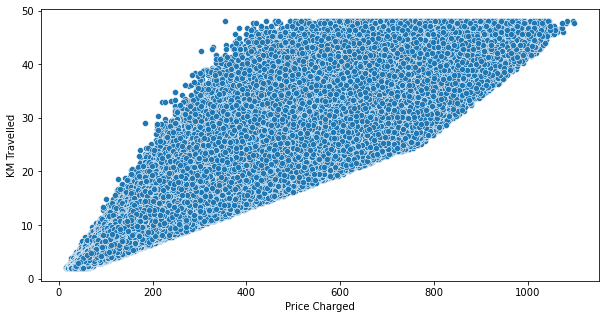

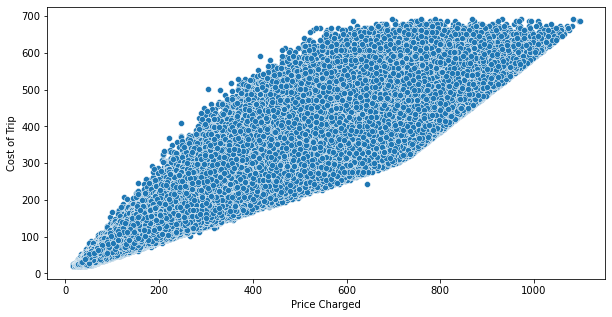

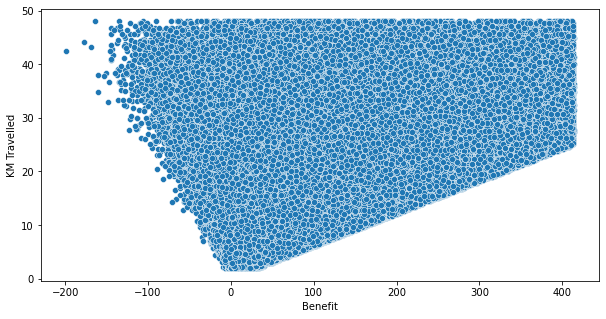

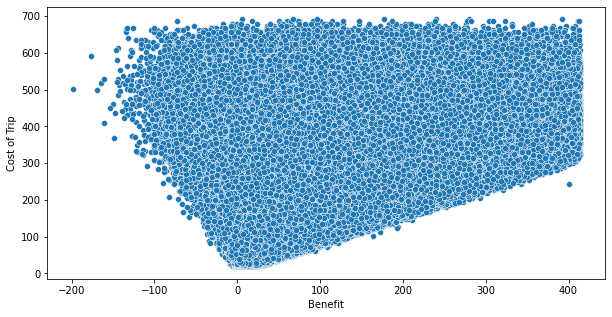

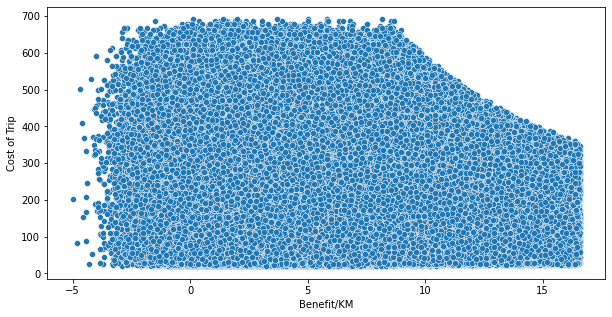

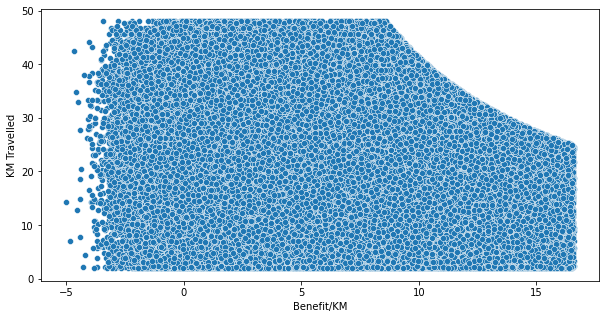

In [104]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Price Charged'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Price Charged'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Benefit'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Benefit'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['Cost of Trip'],x=G2M_Data['Benefit/KM'])
plt.figure(figsize=(10,5))
sns.scatterplot(y=G2M_Data['KM Travelled'],x=G2M_Data['Benefit/KM'])

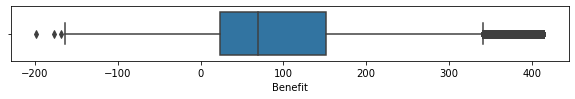

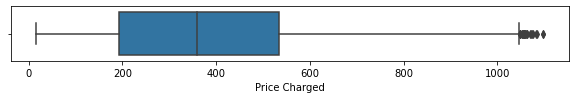

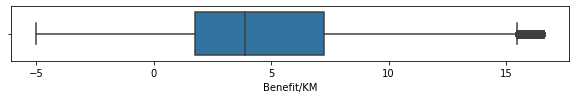

In [32]:
for column in {"Price Charged","Benefit","Benefit/KM"}:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=G2M_Data, x=column)

In [33]:
print("Price Charged outliers removed: " )
display(Price_Charged_Outliers.shape[0])
print("Benefit outliers removed: " )
display(Benefit_Outliers.shape[0])
print("Benefit/KM outliers removed: " )
display(Benefit_KM_Outliers.shape[0])

Price Charged outliers removed: 


5958

Benefit outliers removed: 


20362

Benefit/KM outliers removed: 


10060

# Analysing the data

In [34]:
G2M_Data.columns

Index(['Transaction ID', 'Customer ID', 'Date of Travel', 'Day of Week', 'Day',
       'Month', 'Year', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Benefit', 'Benefit/KM', 'Payment Mode', 'Gender',
       'Age', 'Age Group', 'Income (USD/Month)', 'Income Group'],
      dtype='object')

In [35]:
#Features indexes:
years = [Year for Year, G2M_Data2 in G2M_Data.groupby('Year')]
companies = [Company for Company, G2M_Data2 in G2M_Data.groupby('Company')]
cities = [City for City, G2M_Data2 in G2M_Data.groupby('City')]
age_groups = [Age_Group for Age_Group, G2M_Data2 in G2M_Data.groupby('Age Group')]
income_groups = [Income_Group for Income_Group, G2M_Data2 in G2M_Data.groupby('Income Group')]
genders = [Gender for Gender, G2M_Data2 in G2M_Data.groupby('Gender')]
months = [month for month, G2M_Data2 in G2M_Data.groupby('Month')]
days = [day for day, G2M_Data2 in G2M_Data.groupby('Day')]
week_days = [week_day for week_day, G2M_Data2 in G2M_Data.groupby('Day of Week')]
payments= [payment for payment, G2M_Data2 in G2M_Data.groupby('Payment Mode')]


## 1) Average profit per KM for each company in each year

In [36]:
Avg_Bnft_per_Km = pd.DataFrame(columns=['Year', 'Company', 'Avg Benefit per ride','Avg KM traveled','Avg Benefit per Km'])
for company in companies:
    for year in years:
        Avg_Bnft,Avg_Km,Avg_Bnf_Km=G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Company']==company][['Benefit','KM Travelled','Benefit/KM']].mean()
        Avg_Bnft_per_Km=Avg_Bnft_per_Km.append({'Year': year, 'Company': company, 'Avg Benefit per ride': Avg_Bnft,'Avg KM traveled':Avg_Km, 'Avg Benefit per Km':Avg_Bnf_Km}, ignore_index=True)

display(Avg_Bnft_per_Km)

,Year,Company,Avg Benefit per ride,Avg KM traveled,Avg Benefit per Km
0,2016,Pink Cab,66.34,22.40,2.97
1,2017,Pink Cab,65.25,22.55,2.92
2,2018,Pink Cab,52.72,22.57,2.33
3,2016,Yellow Cab,115.67,21.66,5.68
4,2017,Yellow Cab,117.16,21.64,5.75
5,2018,Yellow Cab,107.43,21.63,5.30


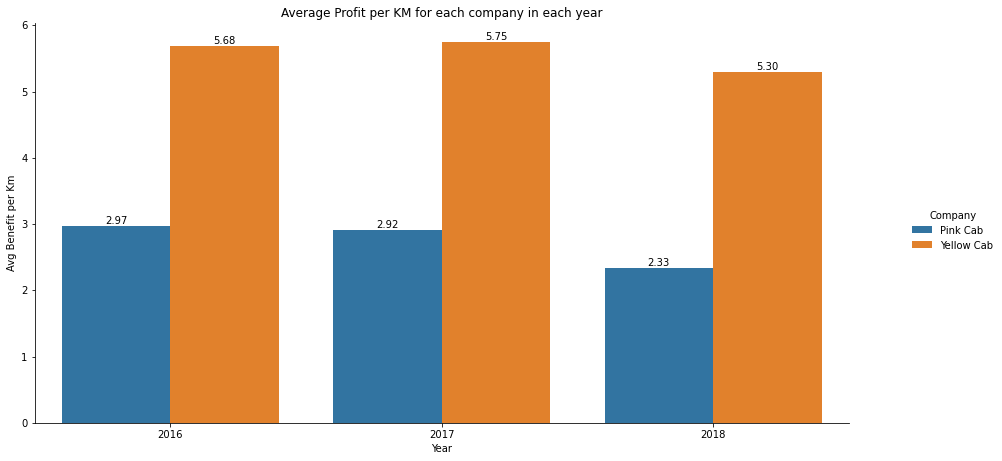

In [37]:
g=sns.catplot(x='Year', y='Avg Benefit per Km', hue='Company', data=Avg_Bnft_per_Km, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Average Profit per KM for each company in each year")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Yellow Cab has more Average Benefit per KM for each year <br>
Pink Cab's Average profit per KM is decreasing by each year

## 2) Average profit per KM for each company in each month

In [38]:
Avg_Bnft_per_Km_m = pd.DataFrame(columns=['Month', 'Company', 'Avg Benefit per ride','Avg KM traveled','Avg Benefit per Km'])
for company in companies:
    for month in months:
        Avg_Bnft,Avg_Km,Avg_Bnf_Km=G2M_Data.loc[G2M_Data['Month']==month].loc[G2M_Data['Company']==company][['Benefit','KM Travelled','Benefit/KM']].mean()
        Avg_Bnft_per_Km_m=Avg_Bnft_per_Km_m.append({'Month': month, 'Company': company, 'Avg Benefit per ride': Avg_Bnft,'Avg KM traveled':Avg_Km, 'Avg Benefit per Km':Avg_Bnf_Km}, ignore_index=True)

display(Avg_Bnft_per_Km_m.head())

,Month,Company,Avg Benefit per ride,Avg KM traveled,Avg Benefit per Km
0,1,Pink Cab,74.98,22.41,3.37
1,2,Pink Cab,73.29,22.52,3.28
2,3,Pink Cab,70.01,22.96,3.04
3,4,Pink Cab,60.06,22.50,2.67
4,5,Pink Cab,33.71,22.48,1.48


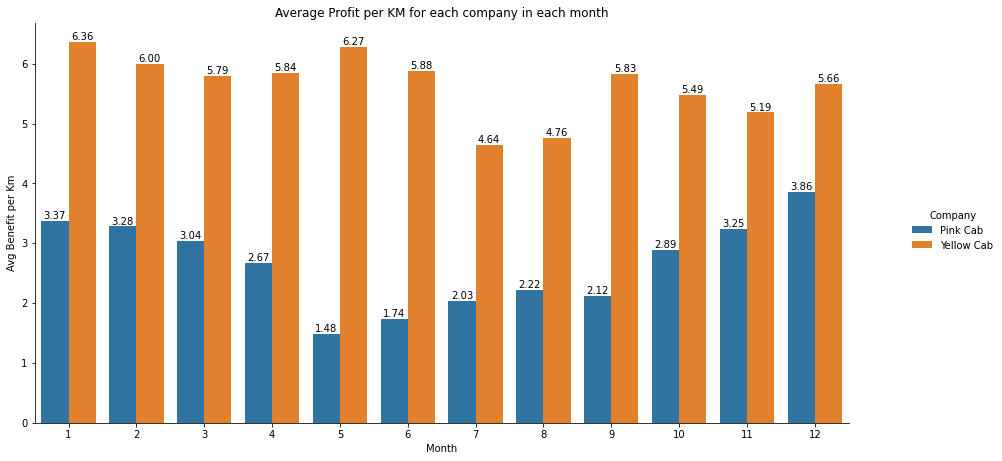

In [39]:
g=sns.catplot(x='Month', y='Avg Benefit per Km', hue='Company', data=Avg_Bnft_per_Km_m, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Average Profit per KM for each company in each month")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Noticable Months where the avergae Benefit per KM is high is : <br>
<li>For Yellow Cab: Months 1,5,2</li>
<li>For Pink Cab: Months 12,1,2</li>

## 3) Average profit per KM for each company in each day

In [40]:
Avg_Bnft_per_Km_d = pd.DataFrame(columns=['Day', 'Company', 'Avg Benefit per ride','Avg KM traveled','Avg Benefit per Km'])
for company in companies:
    for day in days:
        Avg_Bnft,Avg_Km,Avg_Bnf_Km=G2M_Data.loc[G2M_Data['Day']==day].loc[G2M_Data['Company']==company][['Benefit','KM Travelled','Benefit/KM']].mean()
        Avg_Bnft_per_Km_d=Avg_Bnft_per_Km_d.append({'Day': day, 'Company': company, 'Avg Benefit per ride': Avg_Bnft,'Avg KM traveled':Avg_Km, 'Avg Benefit per Km':Avg_Bnf_Km}, ignore_index=True)

display(Avg_Bnft_per_Km_d.head())

,Day,Company,Avg Benefit per ride,Avg KM traveled,Avg Benefit per Km
0,1,Pink Cab,64.42,22.44,2.86
1,2,Pink Cab,60.04,22.52,2.67
2,3,Pink Cab,67.84,23.01,2.99
3,4,Pink Cab,54.99,22.64,2.50
4,5,Pink Cab,66.63,21.98,3.04


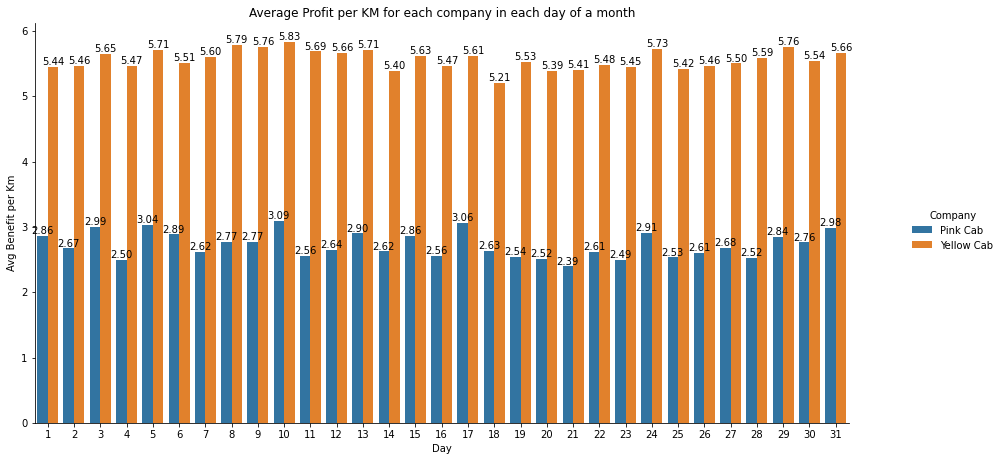

In [41]:
g=sns.catplot(x='Day', y='Avg Benefit per Km', hue='Company', data=Avg_Bnft_per_Km_d, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Average Profit per KM for each company in each day of a month")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Day in a month doesn't seem to affect the benefit per Km a lot

## 4) Average profit per KM for each company in each day of week

In [42]:
Avg_Bnft_per_Km_w = pd.DataFrame(columns=['Day of Week', 'Company', 'Avg Benefit per ride','Avg KM traveled','Avg Benefit per Km'])
for company in companies:
    for week_day in week_days:
        Avg_Bnft,Avg_Km,Avg_Bnf_Km=G2M_Data.loc[G2M_Data['Day of Week']==week_day].loc[G2M_Data['Company']==company][['Benefit','KM Travelled','Benefit/KM']].mean()
        Avg_Bnft_per_Km_w=Avg_Bnft_per_Km_w.append({'Day of Week': week_day, 'Company': company, 'Avg Benefit per ride': Avg_Bnft,'Avg KM traveled':Avg_Km, 'Avg Benefit per Km':Avg_Bnf_Km}, ignore_index=True)

display(Avg_Bnft_per_Km_w.head())

,Day of Week,Company,Avg Benefit per ride,Avg KM traveled,Avg Benefit per Km
0,Friday,Pink Cab,68.20,22.61,3.03
1,Monday,Pink Cab,46.51,22.23,2.10
2,Saturday,Pink Cab,66.14,22.47,2.96
3,Sunday,Pink Cab,75.10,22.66,3.33
4,Thursday,Pink Cab,46.13,22.33,2.08


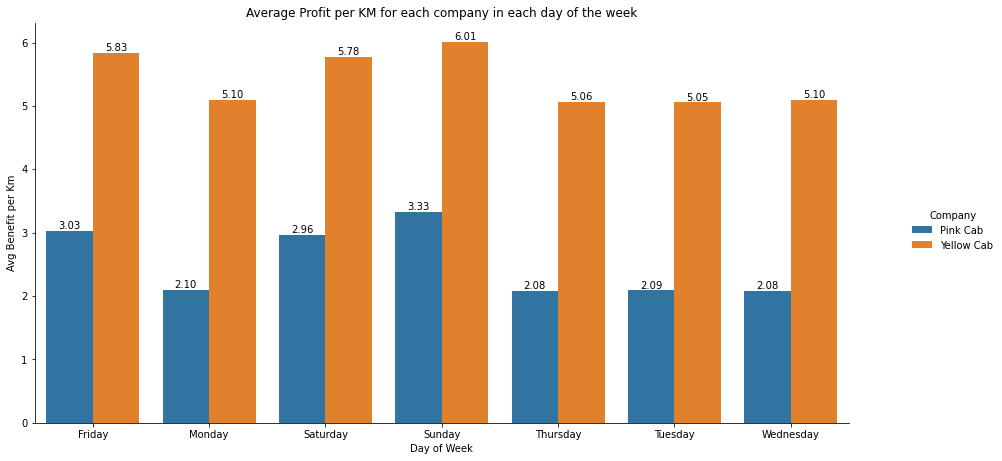

In [43]:
g=sns.catplot(x='Day of Week', y='Avg Benefit per Km', hue='Company', data=Avg_Bnft_per_Km_w, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Average Profit per KM for each company in each day of the week")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

Most profit per Km can be made during the weekend - friday, saturday, sunday

## 5) Profit per ride for each company

In [44]:
#profit per ride
Profit_per_ride = pd.DataFrame(columns=['Company', 'Total Profit','Total Rides'])
for company in companies:
    sum_profit = G2M_Data.loc[G2M_Data['Company']==company,['Benefit']].sum()['Benefit']
    total_rides = G2M_Data.loc[G2M_Data['Company']==company,['Benefit']].count()['Benefit']
    Profit_per_ride=Profit_per_ride.append({'Company':company,'Total Profit': sum_profit, 'Total Rides': total_rides}, ignore_index=True)

Profit_per_ride['Profit per Ride'] = Profit_per_ride['Total Profit']/Profit_per_ride['Total Rides']
Profit_per_ride

,Company,Total Profit,Total Rides,Profit per Ride
0,Pink Cab,5168572.17,84419,61.23
1,Yellow Cab,27024406.49,238593,113.27


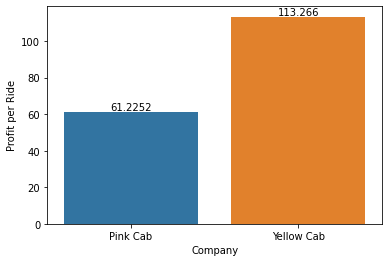

In [45]:
ax =sns.barplot(x='Company', y='Profit per Ride', data=Profit_per_ride)
ax.bar_label(ax.containers[0])
plt.show()

Yellow Cab has more profit for each ride 

##  6) Profit Margin percentage year wise for each company

In [46]:
Profit_perc_year = pd.DataFrame(columns=['Company','Year', 'Total Cost of Trip','Total Price Charged'])
for company in companies:
    for year in years:
        sum_price,sum_cost = G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Company']==company,['Price Charged','Cost of Trip']].sum()
        Profit_perc_year=Profit_perc_year.append({'Company':company,'Year':year,'Total Cost of Trip': sum_cost, 'Total Price Charged': sum_price}, ignore_index=True)

Profit_perc_year['Total Benefit']= (Profit_perc_year['Total Price Charged']-Profit_perc_year['Total Cost of Trip'])
Profit_perc_year['Profit margin%']= ((Profit_perc_year['Total Benefit']/Profit_perc_year['Total Cost of Trip'])*100)
Profit_perc_year

,Company,Year,Total Cost of Trip,Total Price Charged,Total Benefit,Profit margin%
0,Pink Cab,2016,6147796.27,7803593.95,1655797.68,26.93
1,Pink Cab,2017,7490774.41,9460391.14,1969616.73,26.29
2,Pink Cab,2018,7269053.84,8812211.59,1543157.75,21.23
3,Yellow Cab,2016,19992559.04,28069132.88,8076573.84,40.40
4,Yellow Cab,2017,24015514.81,33850100.36,9834585.55,40.95
5,Yellow Cab,2018,24248966.51,33362213.62,9113247.11,37.58


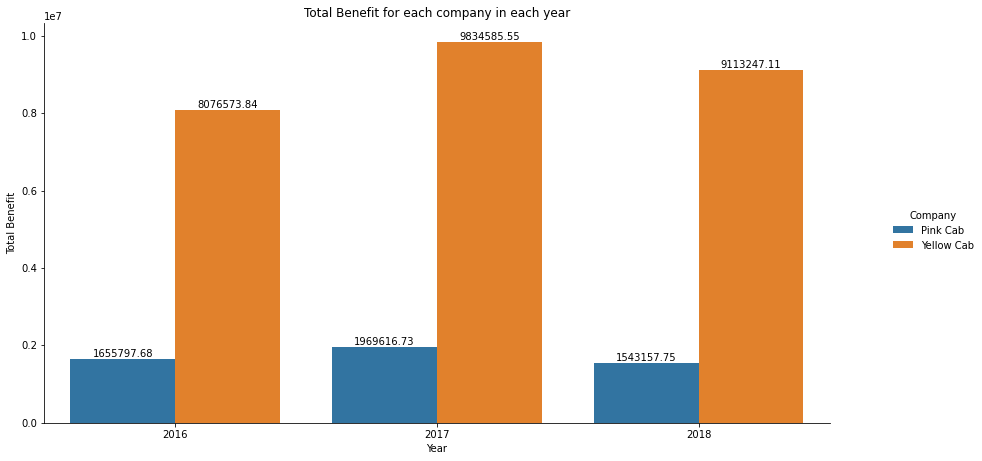

In [47]:
g=sns.catplot(x='Year', y='Total Benefit', hue='Company', data=Profit_perc_year, kind='bar')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
g.set(title="Total Benefit for each company in each year")
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


## 7) Total Profit per Gender each year for each company

In [48]:
Profit_perc_year_gender = pd.DataFrame(columns=['Company','Year','Gender','Total Cost of Trip','Total Price Charged','Count'])
for company in companies:
    for year in years:
        for gender in genders:
            sum_price,sum_cost = G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Gender']==gender].loc[G2M_Data['Company']==company,['Price Charged','Cost of Trip']].sum()
            sum_count = G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Gender']==gender].loc[G2M_Data['Company']==company,['Price Charged']].count()[0]
            Profit_perc_year_gender=Profit_perc_year_gender.append({'Company':company,'Year':year,'Gender':gender,'Total Cost of Trip': sum_cost, 'Total Price Charged': sum_price, 'Count':sum_count}, ignore_index=True)

Profit_perc_year_gender['Total Benefit']= (Profit_perc_year_gender['Total Price Charged']-Profit_perc_year_gender['Total Cost of Trip'])
Profit_perc_year_gender['Profit margin%']= ((Profit_perc_year_gender['Total Benefit']/Profit_perc_year_gender['Total Cost of Trip'])*100)
  
Profit_perc_year_gender

,Company,Year,Gender,Total Cost of Trip,Total Price Charged,Count,Total Benefit,Profit margin%
0,Pink Cab,2016,Female,2666412.07,3375514.97,10816,709102.90,26.59
1,Pink Cab,2016,Male,3481384.20,4428078.98,14142,946694.78,27.19
2,Pink Cab,2017,Female,3327801.77,4192734.15,13407,864932.38,25.99
3,Pink Cab,2017,Male,4162972.63,5267656.99,16781,1104684.35,26.54
4,Pink Cab,2018,Female,3260478.05,3947804.45,13110,687326.40,21.08
5,Pink Cab,2018,Male,4008575.79,4864407.14,16163,855831.35,21.35
6,Yellow Cab,2016,Female,8369391.76,11698661.66,29031,3329269.90,39.78
7,Yellow Cab,2016,Male,11623167.29,16370471.22,40792,4747303.93,40.84
8,Yellow Cab,2017,Female,10331127.30,14516511.98,36034,4185384.68,40.51
9,Yellow Cab,2017,Male,13684387.51,19333588.38,47907,5649200.87,41.28


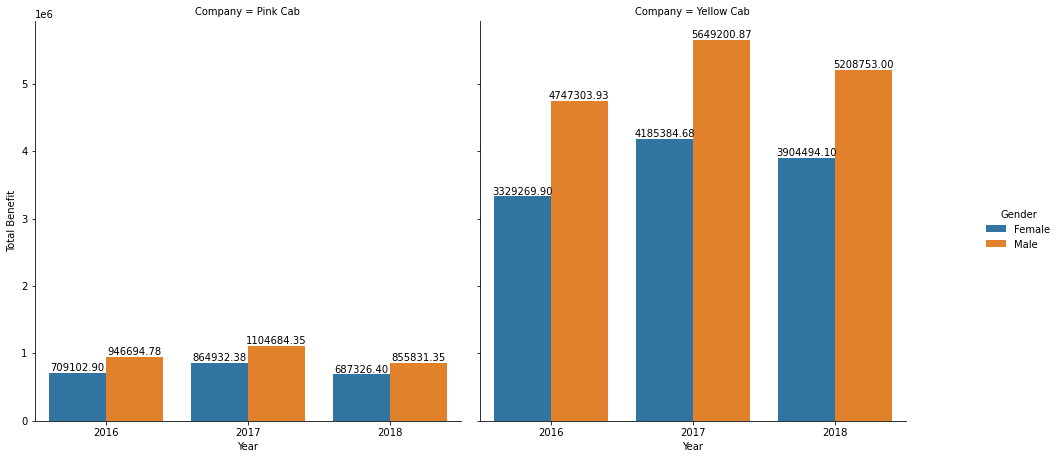

In [49]:
g=sns.catplot(x='Year', y='Total Benefit', hue='Gender',col='Company', data=Profit_perc_year_gender, kind='bar')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax = g.facet_axis(0, 1)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


## 8) Total Benefit per Payment Mode for each company

In [50]:
Profit_perc_year_payment = pd.DataFrame(columns=['Company','Year','Payment Mode','Total Cost of Trip','Total Price Charged','Count'])
for company in companies:
    for year in years:
        for payment in payments:
            sum_price,sum_cost = G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Payment Mode']==payment].loc[G2M_Data['Company']==company,['Price Charged','Cost of Trip']].sum()
            sum_count = G2M_Data.loc[G2M_Data['Year']==year].loc[G2M_Data['Payment Mode']==payment].loc[G2M_Data['Company']==company,['Price Charged']].count()[0]
            Profit_perc_year_payment=Profit_perc_year_payment.append({'Company':company,'Year':year,'Payment Mode':payment,'Total Cost of Trip': sum_cost, 'Total Price Charged': sum_price, 'Count':sum_count}, ignore_index=True)

Profit_perc_year_payment['Total Benefit']= (Profit_perc_year_payment['Total Price Charged']-Profit_perc_year_payment['Total Cost of Trip'])
Profit_perc_year_payment['Profit margin%']= ((Profit_perc_year_payment['Total Benefit']/Profit_perc_year_payment['Total Cost of Trip'])*100)
  
Profit_perc_year_payment

,Company,Year,Payment Mode,Total Cost of Trip,Total Price Charged,Count,Total Benefit,Profit margin%
0,Pink Cab,2016,Card,3691553.12,4689721.44,14929,998168.32,27.04
1,Pink Cab,2016,Cash,2456243.15,3113872.51,10029,657629.36,26.77
2,Pink Cab,2017,Card,4473942.88,5655446.61,18044,1181503.73,26.41
3,Pink Cab,2017,Cash,3016831.53,3804944.53,12144,788113.00,26.12
4,Pink Cab,2018,Card,4371418.37,5291242.62,17576,919824.25,21.04
5,Pink Cab,2018,Cash,2897635.47,3520968.97,11697,623333.50,21.51
6,Yellow Cab,2016,Card,12009087.56,16871644.28,41942,4862556.72,40.49
7,Yellow Cab,2016,Cash,7983471.48,11197488.60,27881,3214017.12,40.26
8,Yellow Cab,2017,Card,14382480.73,20269611.17,50317,5887130.44,40.93
9,Yellow Cab,2017,Cash,9633034.08,13580489.19,33624,3947455.11,40.98


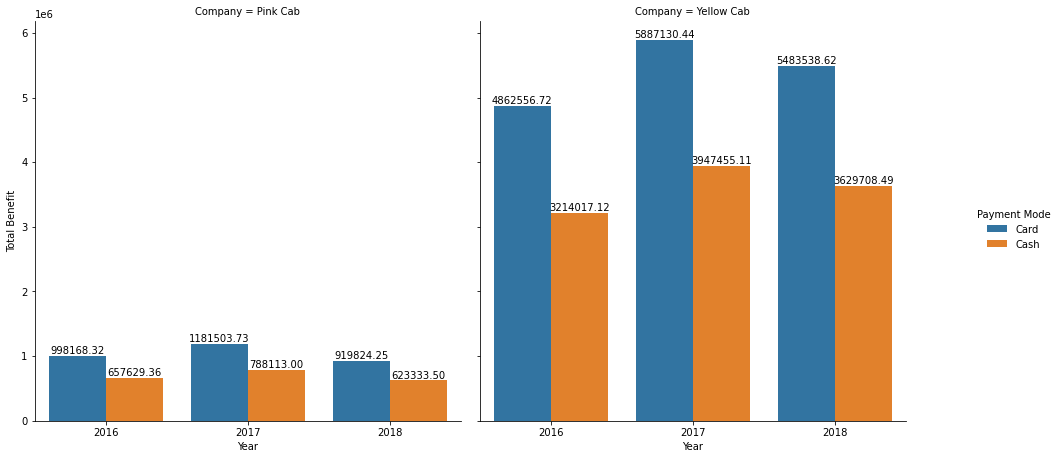

In [51]:
g=sns.catplot(x='Year', y='Total Benefit', hue='Payment Mode',col='Company', data=Profit_perc_year_payment, kind='bar')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax = g.facet_axis(0, 1)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

## 9) Benefit per City for each company

In [52]:
bnft_pink = G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('City').sum()['Benefit']
for city in cities:
     City_Data.loc[City_Data['City']==city,'Pink Cab Benefit']=bnft_pink[city]
City_Data['Pink Cab Benefit'] = City_Data['Pink Cab Benefit'].fillna(0)

bnft_yellow = G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('City').sum()['Benefit']
for city in cities:
     City_Data.loc[City_Data['City']==city,'Yellow Cab Benefit']=bnft_yellow[city]
City_Data['Yellow Cab Benefit'] = City_Data['Yellow Cab Benefit'].fillna(0)

City_Data.head()  

,City,Population,Users,Usage %,Pink Cab Users,Pink Cab% from users,Yellow Cab Users,Yellow Cab% from users,Pink Cab Benefit,Yellow Cab Benefit
0,NEW YORK NY,8405837,302149,3.59,13967,4.62,85918,28.44,1447211.95,10878756.04
1,CHICAGO IL,1955130,164468,8.41,9361,5.69,47264,28.74,317774.55,2997755.32
2,LOS ANGELES CA,1595037,144132,9.04,19865,13.78,28168,19.54,1119353.44,3029974.05
3,MIAMI FL,1339155,17675,1.32,2002,11.33,4452,25.19,116830.82,526172.17
4,SILICON VALLEY,1177609,27247,2.31,3797,13.94,4722,17.33,337381.91,720865.96


In [53]:
Benefit_per_City_pink = City_Data[['City','Pink Cab Benefit','Pink Cab Users']] 
Benefit_per_City_pink=Benefit_per_City_pink.rename(columns={'Pink Cab Benefit':'Total Benefit','Pink Cab Users':'Total Users'})
Benefit_per_City_pink['Company']="Pink Cab"

Benefit_per_City_yellow = City_Data[['City','Yellow Cab Benefit','Yellow Cab Users']] 
Benefit_per_City_yellow=Benefit_per_City_yellow.rename(columns={'Yellow Cab Benefit':'Total Benefit','Yellow Cab Users':'Total Users'})
Benefit_per_City_yellow['Company']="Yellow Cab"

Benefit_per_City = pd.concat([Benefit_per_City_pink,Benefit_per_City_yellow])

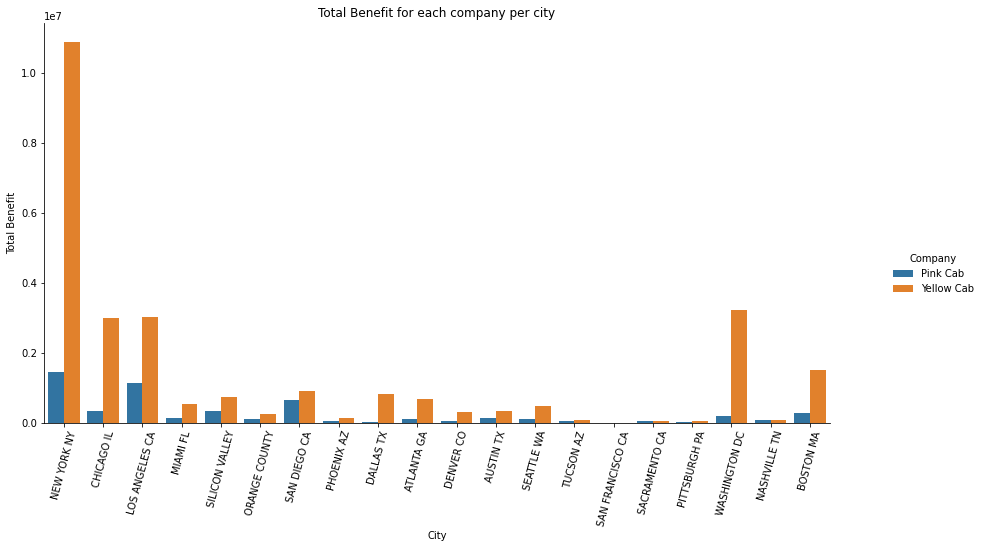

In [54]:
g=sns.catplot(x='City', y='Total Benefit', hue='Company', data=Benefit_per_City, kind='bar')
g.set(title="Total Benefit for each company per city")
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
ax.tick_params(axis='x', rotation=75)

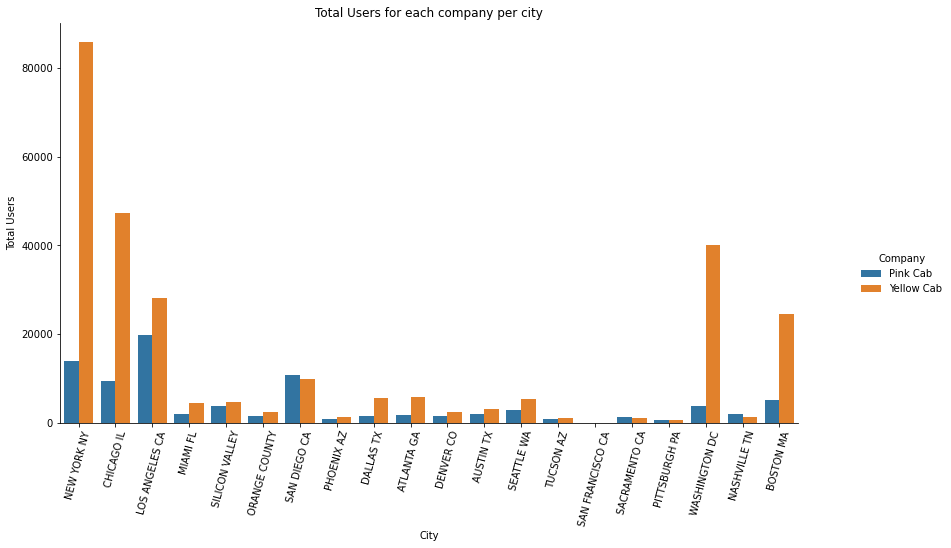

In [55]:
g=sns.catplot(x='City', y='Total Users', hue='Company', data=Benefit_per_City, kind='bar')
g.set(title="Total Users for each company per city")
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
ax.tick_params(axis='x', rotation=75)

## 10) Benefit per age group for each company

In [57]:
age_group_data = pd.DataFrame(columns=['Count Pink Cab','% Pink Users','Benefit Pink Cab','% Benefit Pink Cab','Count Yellow Cab','% Yellow Users','Benefit Yellow Cab', '% Benefit Yellow Cab'])

age_group_data['Count Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('Age Group').count()['Benefit']
sum_pink_users = G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].count()['Benefit']
age_group_data['% Pink Users'] = (age_group_data['Count Pink Cab']/sum_pink_users)*100
age_group_data['Benefit Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('Age Group').sum()['Benefit']
sum_pink_bnft = age_group_data['Benefit Pink Cab'].sum()
age_group_data['% Benefit Pink Cab'] = (age_group_data['Benefit Pink Cab']/sum_pink_bnft)*100


age_group_data['Count Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('Age Group').count()['Benefit']
age_group_data['Benefit Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('Age Group').sum()['Benefit']
sum_yellow_users = G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].count()['Benefit']
age_group_data['% Yellow Users'] = (age_group_data['Count Yellow Cab']/sum_yellow_users)*100
sum_yellow_bnft = age_group_data['Benefit Yellow Cab'].sum()
age_group_data['% Benefit Yellow Cab'] = (age_group_data['Benefit Yellow Cab']/sum_yellow_bnft)*100


age_group_data

,Count Pink Cab,% Pink Users,Benefit Pink Cab,% Benefit Pink Cab,Count Yellow Cab,% Yellow Users,Benefit Yellow Cab,% Benefit Yellow Cab
Age Group,,,,,,,,
18-25,22041,26.11,1366872.67,26.45,61825,25.91,7028190.06,26.01
26-35,26578,31.48,1624383.97,31.43,75357,31.58,8488661.11,31.41
36-45,17774,21.05,1078981.66,20.88,50372,21.11,5742509.96,21.25
46-55,8975,10.63,549229.75,10.63,25683,10.76,2935522.85,10.86
56-65,9051,10.72,549104.12,10.62,25356,10.63,2829522.51,10.47


In [59]:
Benefit_age_group_pink = age_group_data[['Count Pink Cab','Benefit Pink Cab']]
Benefit_age_group_pink = Benefit_age_group_pink.rename(columns={'Benefit Pink Cab':'Total Benefit','Count Pink Cab':'Total Users'})
Benefit_age_group_pink['Age group'] = age_groups
Benefit_age_group_pink['Company'] = "Pink Cab"

Benefit_age_group_yellow = age_group_data[['Count Yellow Cab','Benefit Yellow Cab']]
Benefit_age_group_yellow = Benefit_age_group_yellow.rename(columns={'Benefit Yellow Cab':'Total Benefit','Count Yellow Cab':'Total Users'})
Benefit_age_group_yellow['Age group'] = age_groups
Benefit_age_group_yellow['Company'] = "Yellow Cab"

Benefit_per_age = pd.concat([Benefit_age_group_pink,Benefit_age_group_yellow])
Benefit_per_age.head()

,Total Users,Total Benefit,Age group,Company
Age Group,,,,
18-25,22041,1366872.67,18-25,Pink Cab
26-35,26578,1624383.97,26-35,Pink Cab
36-45,17774,1078981.66,36-45,Pink Cab
46-55,8975,549229.75,46-55,Pink Cab
56-65,9051,549104.12,56-65,Pink Cab


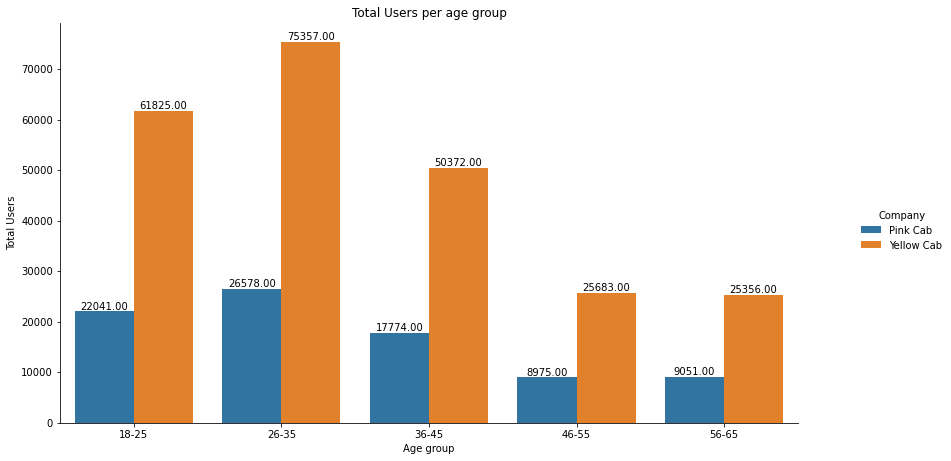

In [60]:
g=sns.catplot(x='Age group', y='Total Users', hue='Company', data=Benefit_per_age, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Total Users per age group")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

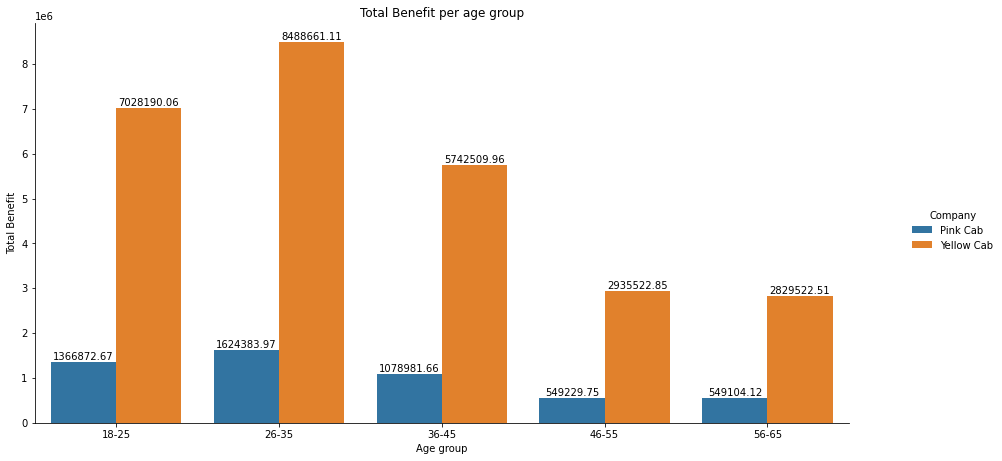

In [61]:
g=sns.catplot(x='Age group', y='Total Benefit', hue='Company', data=Benefit_per_age, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Total Benefit per age group")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

## 11) Total Benefit per Income group for each company

In [62]:
income_group_data = pd.DataFrame(columns=['Count Pink Cab','% Pink Users','Benefit Pink Cab','% Benefit Pink Cab','Count Yellow Cab','% Yellow Users','Benefit Yellow Cab'])

income_group_data['Count Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('Income Group').count()['Benefit']
sum_pink_users = G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].count()['Benefit']
income_group_data['% Pink Users'] = (income_group_data['Count Pink Cab']/sum_pink_users)*100
income_group_data['Benefit Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('Income Group').sum()['Benefit']
income_pink_bnft = income_group_data['Benefit Pink Cab'].sum()
income_group_data['% Benefit Pink Cab'] = (income_group_data['Benefit Pink Cab']/income_pink_bnft)*100



income_group_data['Count Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('Income Group').count()['Benefit']
income_group_data['Benefit Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('Income Group').sum()['Benefit']
sum_yellow_users = G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].count()['Benefit']
income_group_data['% Yellow Users'] = (income_group_data['Count Yellow Cab']/sum_yellow_users)*100
income_yellow_bnft = income_group_data['Benefit Yellow Cab'].sum()
income_group_data['% Benefit Yellow Cab'] = (income_group_data['Benefit Yellow Cab']/income_yellow_bnft)*100


income_group_data

,Count Pink Cab,% Pink Users,Benefit Pink Cab,% Benefit Pink Cab,Count Yellow Cab,% Yellow Users,Benefit Yellow Cab,% Benefit Yellow Cab
Income Group,,,,,,,,
10000-20000,33174,39.30,2037071.63,39.41,94496,39.61,10779174.74,39.89
2000-10000,26592,31.50,1614516.54,31.24,75173,31.51,8437740.62,31.22
20000-30000,20725,24.55,1276257.24,24.69,57882,24.26,6592700.11,24.40
30000,3928,4.65,240726.75,4.66,11042,4.63,1214791.02,4.50


In [63]:
Benefit_income_pink = income_group_data[['Count Pink Cab','Benefit Pink Cab']]
Benefit_income_pink = Benefit_income_pink.rename(columns={'Benefit Pink Cab':'Total Benefit','Count Pink Cab':'Total Users'})
Benefit_income_pink['Income group'] = income_groups
Benefit_income_pink['Company'] = "Pink Cab"

Benefit_income_yellow = income_group_data[['Count Yellow Cab','Benefit Yellow Cab']]
Benefit_income_yellow = Benefit_income_yellow.rename(columns={'Benefit Yellow Cab':'Total Benefit','Count Yellow Cab':'Total Users'})
Benefit_income_yellow['Income group'] = income_groups
Benefit_income_yellow['Company'] = "Yellow Cab"

Benefit_per_income = pd.concat([Benefit_income_pink,Benefit_income_yellow])
Benefit_per_income

,Total Users,Total Benefit,Income group,Company
Income Group,,,,
10000-20000,33174,2037071.63,10000-20000,Pink Cab
2000-10000,26592,1614516.54,2000-10000,Pink Cab
20000-30000,20725,1276257.24,20000-30000,Pink Cab
30000,3928,240726.75,30000,Pink Cab
10000-20000,94496,10779174.74,10000-20000,Yellow Cab
2000-10000,75173,8437740.62,2000-10000,Yellow Cab
20000-30000,57882,6592700.11,20000-30000,Yellow Cab
30000,11042,1214791.02,30000,Yellow Cab


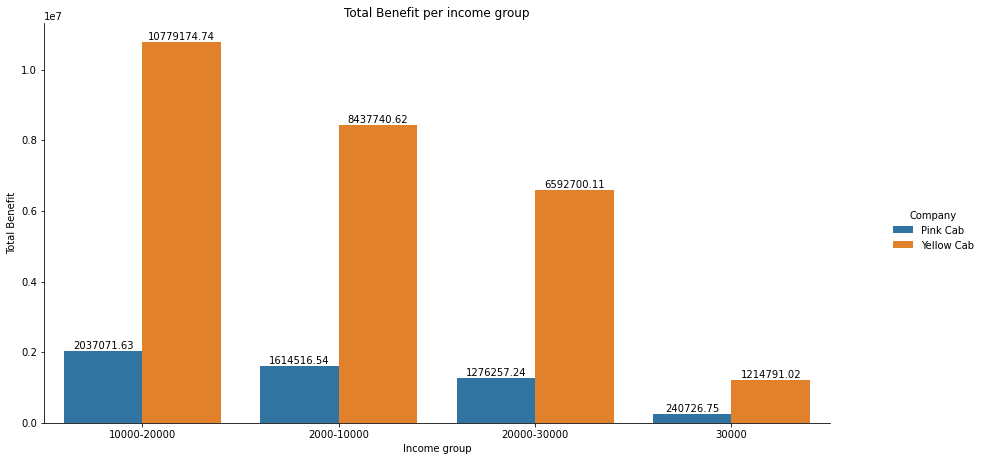

In [64]:
g=sns.catplot(x='Income group', y='Total Benefit', hue='Company', data=Benefit_per_income, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Total Benefit per income group")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

## 12) Number of time customers returned (Customer retention)

In [65]:
G2M_Data['Customer ID'].describe()

count   323012.00
mean     21001.02
std      21309.83
min          1.00
25%       3755.00
50%       8420.00
75%      40648.25
max      60000.00
Name: Customer ID, dtype: float64

In [66]:
pink_users=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"][G2M_Data['Customer ID'].duplicated()]
pink_users=pink_users.groupby('Customer ID').count()
pink_users= pink_users.groupby('City').sum()

yellow_users=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"][G2M_Data['Customer ID'].duplicated()]
yellow_users=yellow_users.groupby('Customer ID').count()
yellow_users= yellow_users.groupby('City').sum()


C:\Users\aaaaa\AppData\Local\Temp/ipykernel_10912/3059924373.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pink_users=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"][G2M_Data['Customer ID'].duplicated()]
C:\Users\aaaaa\AppData\Local\Temp/ipykernel_10912/3059924373.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yellow_users=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"][G2M_Data['Customer ID'].duplicated()]


In [67]:
nb_yellow_users = [nb_yellow for nb_yellow, yellow_users in yellow_users.groupby('City')]
return_Yellow_users = pd.DataFrame(columns={})
return_Yellow_users['Number of users']  = yellow_users['Benefit']
return_Yellow_users['Times used service'] = nb_yellow_users
    
nb_pink_users = [nb_pink for nb_pink, pink_users in pink_users.groupby('City')]
return_pink_users = pd.DataFrame(columns={})
return_pink_users['Number of users']  = pink_users['Benefit']
return_pink_users['Times used service'] = nb_pink_users


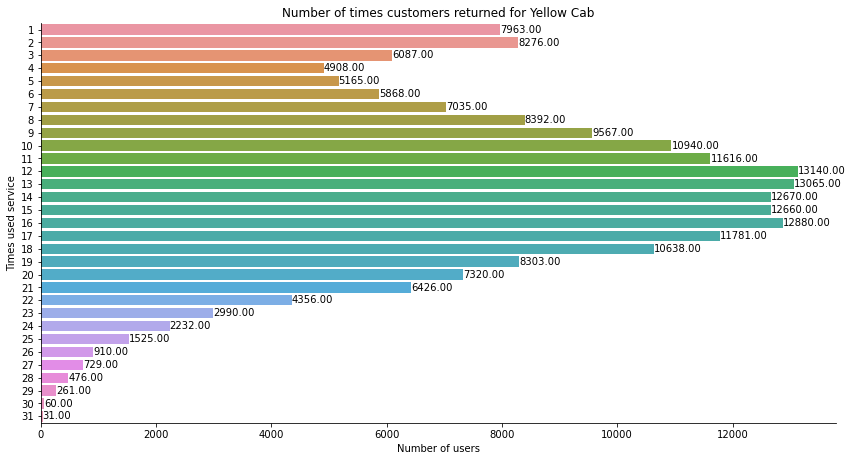

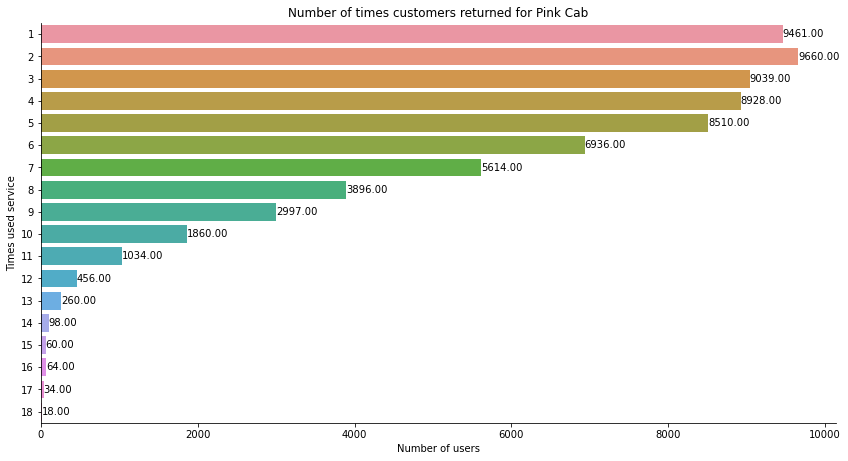

In [68]:
g=sns.catplot(y='Times used service', x='Number of users', data=return_Yellow_users, kind='bar',orient='h')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
g.set(title="Number of times customers returned for Yellow Cab")
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_width()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g=sns.catplot(y='Times used service', x='Number of users', data=return_pink_users, kind='bar',orient='h')
g.fig.set_size_inches(15, 8)
g.set(title="Number of times customers returned for Pink Cab")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_width()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')    

## 13) Total Benefit per KM Travelled range

In [69]:
G2M_Data.loc[(G2M_Data['KM Travelled']>=1) & (G2M_Data['KM Travelled']<10),'KM range']="1-10"
G2M_Data.loc[(G2M_Data['KM Travelled']>=10) & (G2M_Data['KM Travelled']<20),'KM range']="10-20"
G2M_Data.loc[(G2M_Data['KM Travelled']>=20) & (G2M_Data['KM Travelled']<30),'KM range']="20-30"
G2M_Data.loc[(G2M_Data['KM Travelled']>=30) & (G2M_Data['KM Travelled']<40),'KM range']="30-40"
G2M_Data.loc[(G2M_Data['KM Travelled']>=40),'KM range']="40+"

In [70]:
KM_range_data = pd.DataFrame(columns=['Count Pink Cab','% Pink Users','Benefit Pink Cab','% Benefit Pink Cab','Count Yellow Cab','% Yellow Users','Benefit Yellow Cab'])

KM_range_data['Count Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('KM range').count()['Benefit']
sum_pink_users = G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].count()['Benefit']
KM_range_data['% Pink Users'] = (KM_range_data['Count Pink Cab']/sum_pink_users)*100
KM_range_data['Benefit Pink Cab']=G2M_Data.loc[G2M_Data['Company']=="Pink Cab"].groupby('KM range').sum()['Benefit']
sum_pink_bnft = KM_range_data['Benefit Pink Cab'].sum()
KM_range_data['% Benefit Pink Cab'] = (KM_range_data['Benefit Pink Cab']/sum_pink_bnft)*100



KM_range_data['Count Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('KM range').count()['Benefit']
KM_range_data['Benefit Yellow Cab']=G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].groupby('KM range').sum()['Benefit']
sum_yellow_users = G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"].count()['Benefit']
KM_range_data['% Yellow Users'] = (KM_range_data['Count Yellow Cab']/sum_yellow_users)*100
sum_yellow_bnft = KM_range_data['Benefit Yellow Cab'].sum()
KM_range_data['% Benefit Yellow Cab'] = (KM_range_data['Benefit Yellow Cab']/sum_yellow_bnft)*100


KM_range_data

,Count Pink Cab,% Pink Users,Benefit Pink Cab,% Benefit Pink Cab,Count Yellow Cab,% Yellow Users,Benefit Yellow Cab,% Benefit Yellow Cab
KM range,,,,,,,,
1-10,17070,20.22,274682.89,5.31,50904,21.34,1781183.55,6.59
10-20,20368,24.13,835939.96,16.17,60890,25.52,5496350.83,20.34
20-30,20185,23.91,1374269.68,26.59,59615,24.99,8729816.25,32.30
30-40,19863,23.53,1895296.75,36.67,51059,21.40,8309427.65,30.75
40+,6933,8.21,788382.88,15.25,16125,6.76,2707628.22,10.02


In [71]:
km_ranges= [km_range for km_range, G2M_Data2 in G2M_Data.groupby('KM range')]

Benefit_KM_pink = KM_range_data[['Count Pink Cab','Benefit Pink Cab']]
Benefit_KM_pink = Benefit_KM_pink.rename(columns={'Benefit Pink Cab':'Total Benefit','Count Pink Cab':'Total Users'})
Benefit_KM_pink['KM Range'] = km_ranges
Benefit_KM_pink['Company'] = "Pink Cab"

Benefit_KM_yellow = KM_range_data[['Count Yellow Cab','Benefit Yellow Cab']]
Benefit_KM_yellow = Benefit_KM_yellow.rename(columns={'Benefit Yellow Cab':'Total Benefit','Count Yellow Cab':'Total Users'})
Benefit_KM_yellow['KM Range'] = km_ranges
Benefit_KM_yellow['Company'] = "Yellow Cab"

Benefit_per_KMrange = pd.concat([Benefit_KM_pink,Benefit_KM_yellow])


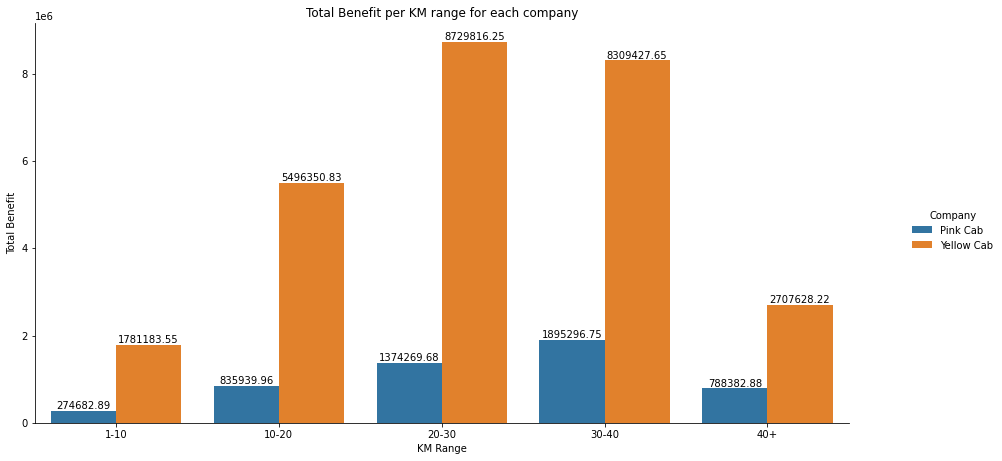

In [72]:
g=sns.catplot(x='KM Range', y='Total Benefit', hue='Company', data=Benefit_per_KMrange, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Total Benefit per KM range for each company")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

## 14) Total Benefit per Holiday

In [73]:
HolidayUS_Data.shape

(30, 4)

In [74]:
HolidayUS_Data['Date of Travel'] = pd.to_datetime(HolidayUS_Data[['Year','Month','Day']])
HolidayUS_Data

,Holiday,Year,Month,Day,Date of Travel
0,New Year Day,2016,1,1,2016-01-01
1,Martin Luther King Day,2016,1,18,2016-01-18
2,President Day,2016,2,15,2016-02-15
3,Memorial Day,2016,5,30,2016-05-30
4,Independence Day,2016,7,4,2016-07-04
5,Labor Day,2016,9,5,2016-09-05
6,Columbus Day,2016,10,10,2016-10-10
7,Veterans Day,2016,11,11,2016-11-11
8,Thanksgiving Day,2016,11,24,2016-11-24
9,Christmas Day,2016,12,25,2016-12-25


In [75]:
Benefit_date = G2M_Data[['Date of Travel','Benefit']]
Benefit_date_pink = G2M_Data.loc[G2M_Data['Company']=="Pink Cab"][['Date of Travel','Benefit']] 
Benefit_date_pink=Benefit_date_pink.rename(columns={'Benefit':'Benefit Pink Cab'})
Benefit_date_yellow = G2M_Data.loc[G2M_Data['Company']=="Yellow Cab"][['Date of Travel','Benefit']] 
Benefit_date_yellow=Benefit_date_yellow.rename(columns={'Benefit':'Benefit Yellow Cab'})

Benefit_date_pink = Benefit_date_pink.groupby(['Date of Travel']).agg({ 'Benefit Pink Cab':'sum' })
Benefit_date_yellow = Benefit_date_yellow.groupby(['Date of Travel']).agg({ 'Benefit Yellow Cab':'sum' })
Benefit_date = Benefit_date.groupby(['Date of Travel']).agg({ 'Benefit':'sum' })

HolidayUS_Data = HolidayUS_Data.merge(Benefit_date, on='Date of Travel', how='left')
HolidayUS_Data = HolidayUS_Data.merge(Benefit_date_pink, on='Date of Travel', how='left')
HolidayUS_Data = HolidayUS_Data.merge(Benefit_date_yellow, on='Date of Travel', how='left')
HolidayUS_Data['% Benefit Pink Cab'] = HolidayUS_Data['Benefit Pink Cab']/HolidayUS_Data['Benefit']
HolidayUS_Data['% Benefit Yellow Cab'] = HolidayUS_Data['Benefit Yellow Cab']/HolidayUS_Data['Benefit']

In [76]:
Holiday_sum = HolidayUS_Data.groupby('Holiday').sum()
holiday_dates= [holiday_date for holiday_date, HolidayUS_Data2 in HolidayUS_Data.groupby('Holiday')]

Benefit_holiday_pink = Holiday_sum[['Benefit Pink Cab']]
Benefit_holiday_pink = Benefit_holiday_pink.rename(columns={'Benefit Pink Cab':'Total Benefit'})
Benefit_holiday_pink['Holiday Date'] = holiday_dates
Benefit_holiday_pink['Company'] = "Pink Cab"

Benefit_holiday_yellow = Holiday_sum[['Benefit Yellow Cab']]
Benefit_holiday_yellow = Benefit_holiday_yellow.rename(columns={'Benefit Yellow Cab':'Total Benefit'})
Benefit_holiday_yellow['Holiday Date'] = holiday_dates
Benefit_holiday_yellow['Company'] = "Yellow Cab"

Benefit_Holiday = pd.concat([Benefit_holiday_pink,Benefit_holiday_yellow])
Benefit_Holiday

,Total Benefit,Holiday Date,Company
Holiday,,,
Christmas Day,31629.90,Christmas Day,Pink Cab
Columbus Day,9330.75,Columbus Day,Pink Cab
Independence Day,3531.23,Independence Day,Pink Cab
Labor Day,6222.13,Labor Day,Pink Cab
Martin Luther King Day,2844.53,Martin Luther King Day,Pink Cab
Memorial Day,2077.53,Memorial Day,Pink Cab
New Year Day,30977.09,New Year Day,Pink Cab
President Day,2583.11,President Day,Pink Cab
Thanksgiving Day,16255.07,Thanksgiving Day,Pink Cab


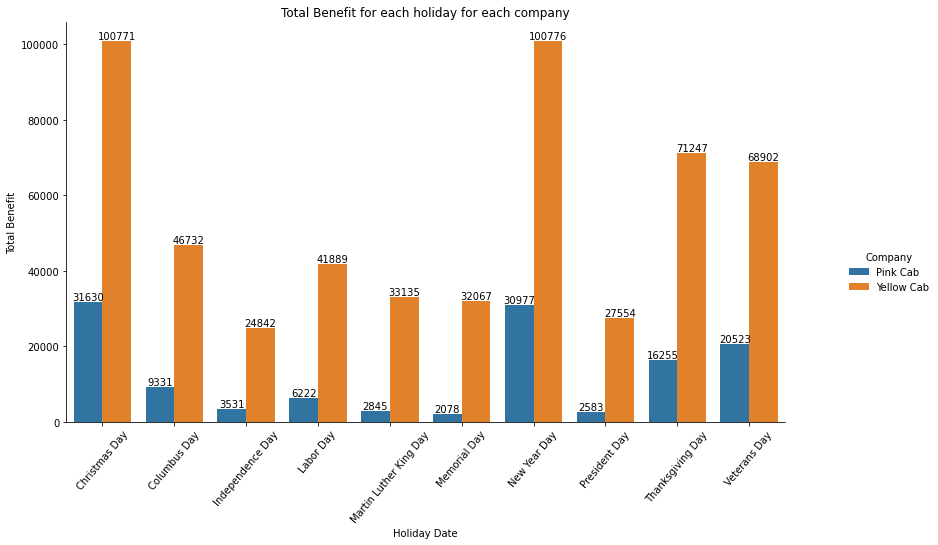

In [79]:
g=sns.catplot(x='Holiday Date', y='Total Benefit', hue='Company', data=Benefit_Holiday, kind='bar')
g.fig.set_size_inches(15, 8)
g.set(title="Total Benefit for each holiday for each company")
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
ax.tick_params(axis='x', rotation=50)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

# Recommendation 

From the previous analysis, I recommend an investment into Yellow Cab for the following reason:
<li>The benefit per ride two times higher than Pink Cab.</li>
<li>Yellow Cab has the high benefit in all cities, even in cities where there are more users that use the Pink Cab Company </li>
<li>Customers that have used the Yellow Cab services are more likely to return for the services (higher customer retention)</li>
<li> For both companies there was an increase in profit margin from 2016 to 2017, and a descrease from 2017 to 2018 but the Yellow Cab company had less decrease.</li>